## 1. Simple Convolution Demo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def simple_conv2d(image, kernel, padding=0, stride=1):
    """
    Simple 2D convolution function using only NumPy
    """
    # Add padding if needed
    if padding > 0:
        padded_image = np.pad(image, padding, mode='constant', constant_values=0)
    else:
        padded_image = image
    
    # Get dimensions
    img_h, img_w = padded_image.shape
    ker_h, ker_w = kernel.shape
    
    # Calculate output dimensions
    out_h = (img_h - ker_h) // stride + 1
    out_w = (img_w - ker_w) // stride + 1
    
    # Initialize output array
    output = np.zeros((out_h, out_w))
    
    # Perform convolution
    for i in range(out_h):
        for j in range(out_w):
            # Extract region of interest
            roi = padded_image[i*stride:i*stride+ker_h, j*stride:j*stride+ker_w]
            # Element-wise multiplication and sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

# Test with a simple 5x5 image
test_image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# 3x3 mean kernel (each value is 1/9)
mean_kernel = np.ones((3, 3)) / 9

print("Input image (5x5):")
print(test_image)
print("\nConvolution kernel (3x3 mean):")
print(mean_kernel)

result = simple_conv2d(test_image, mean_kernel)
print("\nOutput result:")
print(result)
print("\nThis is convolution!")

Input image (5x5):
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Convolution kernel (3x3 mean):
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Output result:
[[ 7.  8.  9.]
 [12. 13. 14.]
 [17. 18. 19.]]

This is convolution!


## 2. Blur the Cat Image

Successfully loaded cat image


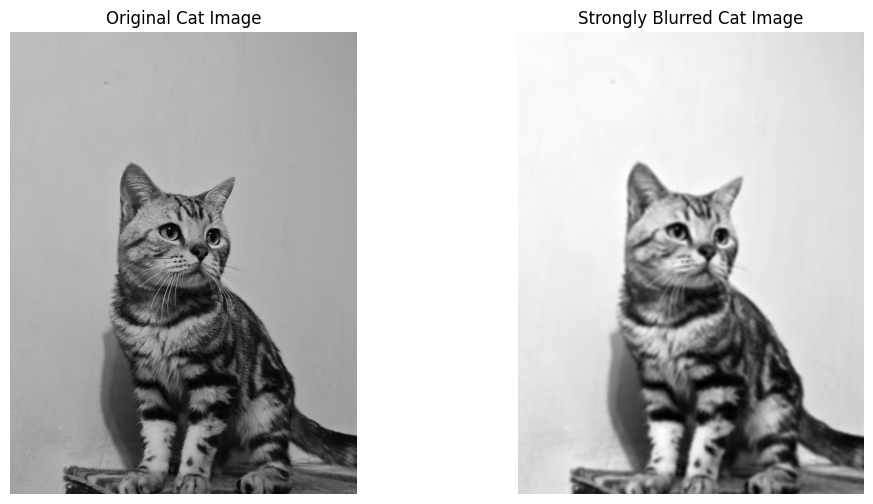

Original image shape: (2048, 1536)
Blurred image shape: (2034, 1522)
Blur kernel size: 15x15


In [5]:
import os

# Load the cat image
image_path = "/Users/y-mac/Code/Selene-Blog/sources/cat.jpeg"

# Check if file exists
if os.path.exists(image_path):
    # Load and convert to grayscale
    original_image = Image.open(image_path).convert('L')
    gray_image = np.array(original_image)
    print("Successfully loaded cat image")
else:
    # Create a random image if cat image doesn't exist
    gray_image = (np.random.rand(100, 100) * 255).astype(np.uint8)
    print("Cat image not found, using random image instead")

# Create 15x15 mean kernel for stronger blur effect
blur_kernel = np.ones((15, 15)) / 225  # 225 = 15x15

# Apply convolution (blur the image)
blurred_image = simple_conv2d(gray_image.astype(float), blur_kernel)

# Display original and blurred images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original Cat Image')
ax1.axis('off')

ax2.imshow(blurred_image, cmap='gray')
ax2.set_title('Strongly Blurred Cat Image')
ax2.axis('off')

plt.show()

print(f"Original image shape: {gray_image.shape}")
print(f"Blurred image shape: {blurred_image.shape}")
print("Blur kernel size: 15x15")

## 3. Edge Detection

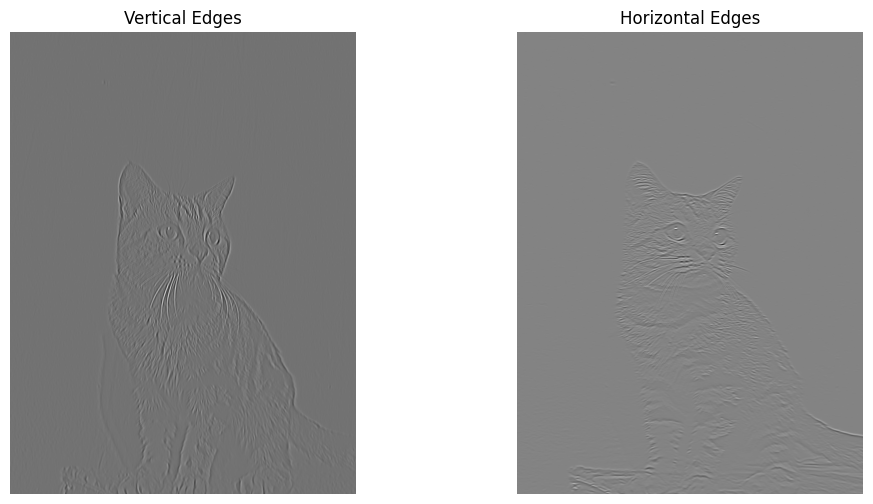

Vertical edges: detect changes in vertical direction
Horizontal edges: detect changes in horizontal direction


In [6]:
# Create vertical edge detection kernel
# Middle column is +2, side columns are -1, detects vertical edges
vertical_kernel = np.zeros((11, 11))  # Larger kernel for better edge detection
vertical_kernel[:, 5] = 2  # Middle column
vertical_kernel[:, [0, 10]] = -1  # First and last columns

# Create horizontal edge detection kernel
# Middle row is +2, top/bottom rows are -1, detects horizontal edges
horizontal_kernel = np.zeros((11, 11))  # Larger kernel for better edge detection
horizontal_kernel[5, :] = 2  # Middle row
horizontal_kernel[[0, 10], :] = -1  # First and last rows

# Apply vertical edge detection
vertical_edges = simple_conv2d(gray_image.astype(float), vertical_kernel)

# Apply horizontal edge detection
horizontal_edges = simple_conv2d(gray_image.astype(float), horizontal_kernel)

# Display edge detection results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(vertical_edges, cmap='gray')
ax1.set_title('Vertical Edges')
ax1.axis('off')

ax2.imshow(horizontal_edges, cmap='gray')
ax2.set_title('Horizontal Edges')
ax2.axis('off')

plt.show()

print("Vertical edges: detect changes in vertical direction")
print("Horizontal edges: detect changes in horizontal direction")